In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
df = pd.read_csv("../csv/main.csv", encoding="UTF-8")

In [3]:
df.columns

Index(['Geography', 'Per Capita Income (2016)', 'All People Under PL(%)',
       'Female household under PL (%)', '%onFoodStamps', 'DIABETES_AdjPrev',
       'OBESITY_AdjPrev', 'DENTAL_AdjPrev', '% of pop 15+ not married',
       '% of Pop 15+ Now Married', 'Geolocation'],
      dtype='object')

In [4]:
df.describe()

,Per Capita Income (2016),All People Under PL(%),Female household under PL (%),%onFoodStamps,DIABETES_AdjPrev,OBESITY_AdjPrev,DENTAL_AdjPrev,% of pop 15+ not married,% of Pop 15+ Now Married
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,30134.411885,16.054508,26.460451,13.851434,10.289754,29.085246,62.169262,38.303279,45.422951
std,9834.990940,7.316350,10.808012,8.329978,2.374829,5.755421,7.458220,8.181947,8.420607
min,13652.000000,2.700000,2.100000,0.900000,5.400000,15.200000,38.800000,20.000000,23.400000
25%,23389.000000,10.500000,18.200000,7.600000,8.475000,25.075000,56.700000,32.600000,39.675000
50%,27794.500000,15.500000,27.100000,12.900000,10.100000,29.150000,62.100000,37.100000,45.800000
75%,34423.250000,20.400000,33.525000,18.200000,11.700000,33.100000,67.500000,43.600000,51.025000
max,85801.000000,44.500000,63.900000,47.900000,18.200000,47.200000,79.700000,62.800000,67.300000


In [5]:
df.isnull().sum()

Geography                        0
Per Capita Income (2016)         0
All People Under PL(%)           0
Female household under PL (%)    0
%onFoodStamps                    0
DIABETES_AdjPrev                 0
OBESITY_AdjPrev                  0
DENTAL_AdjPrev                   0
% of pop 15+ not married         0
% of Pop 15+ Now Married         0
Geolocation                      0
dtype: int64

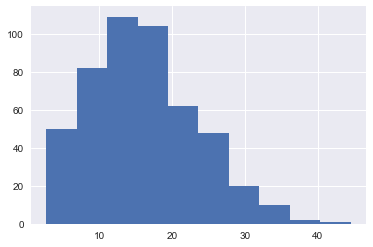

In [6]:
df.loc[df['All People Under PL(%)'] <= 15, "poor_factor"] = 1
df.loc[df['All People Under PL(%)'] > 15, "poor_factor"] = 0
df['All People Under PL(%)'].hist()

LinearSVC
===========

In [7]:
target = df["poor_factor"]
target_names = ["poorer", "wealthier"]
data = df.drop(["Geography", "Geolocation", "All People Under PL(%)", "poor_factor"], axis=1)
features_names = data.columns

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
svc_model = SVC(kernel='linear')

In [9]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
print('Test Acc: %.3f' % svc_model.score(X_test, y_test))
MSE_svc = mean_squared_error(y_test, svc_model.predict(X_test))  
print(f"MSE: {MSE_svc}")

Test Acc: 0.885
MSE: 0.11475409836065574


In [11]:
predictions = svc_model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

     poorer       0.85      0.93      0.89        61
  wealthier       0.93      0.84      0.88        61

avg / total       0.89      0.89      0.88       122



LinearSVC with Standard Scaling
=================

In [12]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(data, target, random_state=42)
svc_model_s = SVC(kernel='linear')

In [13]:
X_scaler = StandardScaler().fit(X_train_)
X_train_scaled = X_scaler.transform(X_train_)
X_test_scaled = X_scaler.transform(X_test_)

In [14]:
svc_model_s.fit(X_train_scaled, y_train_)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
print('Test Acc: %.3f' % svc_model_s.score(X_test_scaled, y_test_))

Test Acc: 0.918


In [16]:
MSE_svc_ = mean_squared_error(y_test_, svc_model_s.predict(X_test_scaled))  
print(f"MSE: {MSE_svc_}")

MSE: 0.08196721311475409


In [17]:
predictions = svc_model_s.predict(X_test_scaled)
print(classification_report(y_test_, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

     poorer       0.88      0.97      0.92        61
  wealthier       0.96      0.87      0.91        61

avg / total       0.92      0.92      0.92       122



In [42]:
svc_model_s.coef_

array([[ 0.27755156, -0.72243966, -0.54791386,  0.58505672, -0.23476349,
         0.94184869, -0.4282913 ,  1.09702031]])

KNeighbors Classifier
============

In [18]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(data, target, random_state=42)


k: 1, Train/Test Score: 1.000/0.598
k: 3, Train/Test Score: 0.852/0.664
k: 5, Train/Test Score: 0.801/0.697
k: 7, Train/Test Score: 0.803/0.689
k: 9, Train/Test Score: 0.798/0.697
k: 11, Train/Test Score: 0.790/0.705
k: 13, Train/Test Score: 0.768/0.697
k: 15, Train/Test Score: 0.757/0.697
k: 17, Train/Test Score: 0.760/0.713
k: 19, Train/Test Score: 0.760/0.705


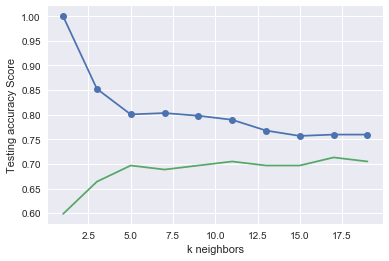

In [19]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train_knn)
    train_score = knn.score(X_train_knn, y_train_knn)
    test_score = knn.score(X_test_knn, y_test_knn)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [20]:
X_scaler_knn = StandardScaler().fit(X_train_knn)
X_train_scaled_knn = X_scaler_knn.transform(X_train_knn)
X_test_scaled_knn = X_scaler_knn.transform(X_test_knn)

k: 1, Train/Test Score: 1.000/0.893
k: 3, Train/Test Score: 0.929/0.893
k: 5, Train/Test Score: 0.899/0.918
k: 7, Train/Test Score: 0.904/0.934
k: 9, Train/Test Score: 0.904/0.934
k: 11, Train/Test Score: 0.896/0.918
k: 13, Train/Test Score: 0.885/0.902
k: 15, Train/Test Score: 0.888/0.910
k: 17, Train/Test Score: 0.888/0.910
k: 19, Train/Test Score: 0.883/0.902


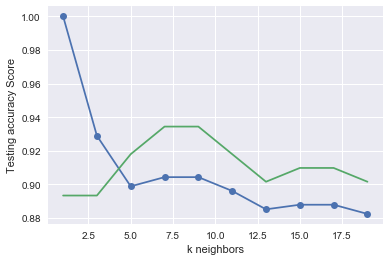

In [21]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_knn, y_train_knn)
    train_score = knn.score(X_train_scaled_knn, y_train_knn)
    test_score = knn.score(X_test_scaled_knn, y_test_knn)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

Random Forest 
==========

In [22]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(data, target, random_state=42)

In [23]:
rf = RandomForestClassifier(n_estimators=100)

In [24]:
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [25]:
rf.score(X_test_rf, y_test_rf)

0.9016393442622951

In [26]:
predictions = rf.predict(X_test_rf)
print(classification_report(y_test_rf, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

     poorer       0.89      0.92      0.90        61
  wealthier       0.92      0.89      0.90        61

avg / total       0.90      0.90      0.90       122



In [27]:
MSE_rf = mean_squared_error(y_test_rf, rf.predict(X_test_rf))  
print(f"MSE: {MSE_rf}")

MSE: 0.09836065573770492


Random Forest (Scaled)
===============

In [28]:
X_train_rf_, X_test_rf_, y_train_rf_, y_test_rf_ = train_test_split(data, target, random_state=42)

In [29]:
rf_ = RandomForestClassifier(n_estimators=100)

In [30]:
X_scaler_rf = StandardScaler().fit(X_train_rf_)
X_train_scaled_rf = X_scaler_rf.transform(X_train_rf_)
X_test_scaled_rf = X_scaler_rf.transform(X_test_rf_)

In [31]:
rf_.fit(X_train_scaled_rf, y_train_rf_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [32]:
rf_.score(X_test_scaled_rf, y_test_rf_)

0.9098360655737705

In [33]:
predictions = rf_.predict(X_test_scaled_rf)
print(classification_report(y_test_rf_, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

     poorer       0.89      0.93      0.91        61
  wealthier       0.93      0.89      0.91        61

avg / total       0.91      0.91      0.91       122



Logistic Regression
============

In [34]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(data, target, random_state=42)
X_scaler_lr = StandardScaler().fit(X_train_lr)
X_train_scaled_lr = X_scaler_lr.transform(X_train_lr)
X_test_scaled_lr = X_scaler_lr.transform(X_test_lr)

In [35]:
lrc = LogisticRegression()

In [36]:
lrc.fit(X_train_scaled_lr, y_train_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
print('Test Acc: %.3f' % lrc.score(X_test_scaled_lr, y_test_lr))

Test Acc: 0.910


In [38]:
predictions = lrc.predict(X_test_scaled_lr)
print(classification_report(y_test_lr, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

     poorer       0.88      0.95      0.91        61
  wealthier       0.95      0.87      0.91        61

avg / total       0.91      0.91      0.91       122



In [39]:
lrc.coef_

array([[ 0.53753617, -1.11335625, -1.00378221,  0.47266509, -0.19535177,
         0.91712711, -0.49366215,  1.68231782]])

In [40]:
data.columns

Index(['Per Capita Income (2016)', 'Female household under PL (%)',
       '%onFoodStamps', 'DIABETES_AdjPrev', 'OBESITY_AdjPrev',
       'DENTAL_AdjPrev', '% of pop 15+ not married',
       '% of Pop 15+ Now Married'],
      dtype='object')

Full Classification Reports
==============

In [43]:
predictions = svc_model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

     poorer       0.85      0.93      0.89        61
  wealthier       0.93      0.84      0.88        61

avg / total       0.89      0.89      0.88       122



In [44]:
predictions = svc_model_s.predict(X_test_scaled)
print(classification_report(y_test_, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

     poorer       0.88      0.97      0.92        61
  wealthier       0.96      0.87      0.91        61

avg / total       0.92      0.92      0.92       122



In [45]:
predictions = rf.predict(X_test_rf)
print(classification_report(y_test_rf, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

     poorer       0.89      0.92      0.90        61
  wealthier       0.92      0.89      0.90        61

avg / total       0.90      0.90      0.90       122



In [46]:
predictions = rf_.predict(X_test_scaled_rf)
print(classification_report(y_test_rf_, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

     poorer       0.89      0.93      0.91        61
  wealthier       0.93      0.89      0.91        61

avg / total       0.91      0.91      0.91       122



In [47]:
predictions = lrc.predict(X_test_scaled_lr)
print(classification_report(y_test_lr, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

     poorer       0.88      0.95      0.91        61
  wealthier       0.95      0.87      0.91        61

avg / total       0.91      0.91      0.91       122

